In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('Train.txt')
df_test = pd.read_csv('Test.txt')

In [3]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


# EDA



In [5]:
df_train['Item_Identifier'].value_counts().head(10)

FDW13    10
FDG33    10
NCL31     9
FDP25     9
FDF56     9
FDG09     9
FDT07     9
NCI54     9
DRE49     9
FDX20     9
Name: Item_Identifier, dtype: int64

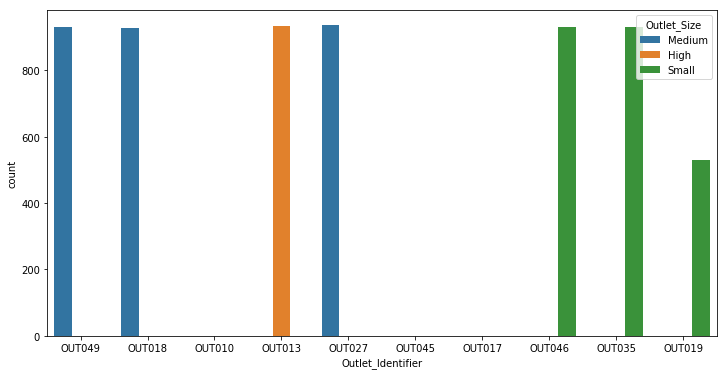

In [142]:
plt.figure(figsize = (12,6))
sns.countplot(df_train['Outlet_Identifier'], hue = df_train['Outlet_Size'])

In [ ]:
# OUT010,OUT017,OUT045 does not have any outlet size defined.

In [6]:
df_train.groupby('Outlet_Identifier')['Outlet_Size'].count()

Outlet_Identifier
OUT010      0
OUT013    932
OUT017      0
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045      0
OUT046    930
OUT049    930
Name: Outlet_Size, dtype: int64

In [144]:

df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [47]:
# Max number of SuperMarket Type1 existing in Dataset.

In [145]:
df_train[df_train.Outlet_Identifier == 'OUT010']['Outlet_Type'].unique()

array(['Grocery Store'], dtype=object)

In [146]:
df_train[df_train.Outlet_Identifier == 'OUT017']['Outlet_Type'].unique()

array(['Supermarket Type1'], dtype=object)

In [147]:
df_train[df_train.Outlet_Identifier == 'OUT045']['Outlet_Type'].unique()

array(['Supermarket Type1'], dtype=object)

In [73]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [59]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [60]:
df_train.groupby('Outlet_Type')['Outlet_Location_Type'].count()

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Location_Type, dtype: int64

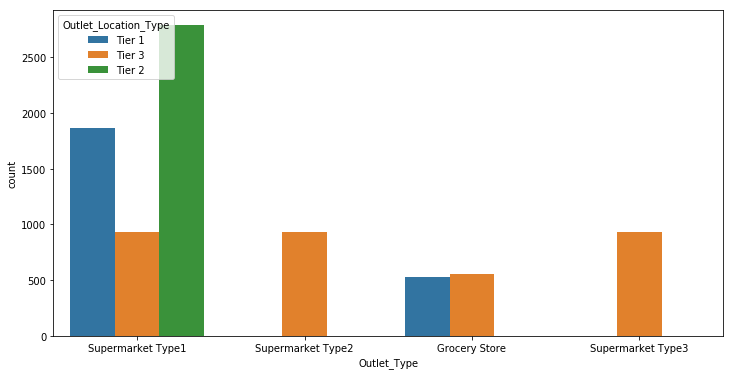

In [61]:
plt.figure(figsize = (12,6))
sns.countplot(df_train['Outlet_Type'], hue = df_train['Outlet_Location_Type'])

In [62]:
# Supermarket Type1 is in all the Tier1,2,3 however Type2 and Type3 are in Tier3 . Grocery store is in Tier1 and Tier 3 both.

In [63]:
# Looking at the history since Out010,Out045,Out017 are having supermarket type1 and Grocery type likely to be in Tier 1 city.

In [65]:
df_train.groupby('Outlet_Size')['Outlet_Location_Type'].value_counts()


Outlet_Size  Outlet_Location_Type
High         Tier 3                   932
Medium       Tier 3                  1863
             Tier 1                   930
Small        Tier 1                  1458
             Tier 2                   930
Name: Outlet_Location_Type, dtype: int64

In [66]:
df_train.groupby('Outlet_Size')['Outlet_Type'].value_counts()

Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type3     935
             Supermarket Type1     930
             Supermarket Type2     928
Small        Supermarket Type1    1860
             Grocery Store         528
Name: Outlet_Type, dtype: int64

In [67]:
df_train.groupby('Outlet_Location_Type')['Outlet_Type'].value_counts()

Outlet_Location_Type  Outlet_Type      
Tier 1                Supermarket Type1    1860
                      Grocery Store         528
Tier 2                Supermarket Type1    2785
Tier 3                Supermarket Type3     935
                      Supermarket Type1     932
                      Supermarket Type2     928
                      Grocery Store         555
Name: Outlet_Type, dtype: int64

In [113]:
df_train['Outlet_Identifier'].isna().count()

8523

In [144]:
df_train[df_train.Outlet_Identifier == 'OUT010']['Outlet_Size'].isna().count()

555

In [154]:
df_train.groupby('Outlet_Identifier')['Outlet_Location_Type'].value_counts()

Outlet_Identifier  Outlet_Location_Type
OUT010             Tier 3                  555
OUT013             Tier 3                  932
OUT017             Tier 2                  926
OUT018             Tier 3                  928
OUT019             Tier 1                  528
OUT027             Tier 3                  935
OUT035             Tier 2                  930
OUT045             Tier 2                  929
OUT046             Tier 1                  930
OUT049             Tier 1                  930
Name: Outlet_Location_Type, dtype: int64

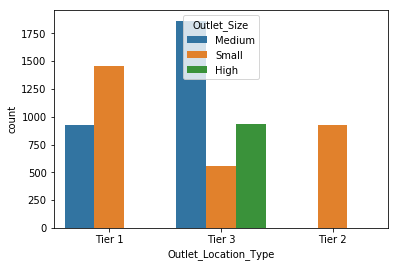

In [157]:
sns.countplot(df_train['Outlet_Location_Type'], hue = df_train['Outlet_Size'])

# Handling the Missing Value for Outlet Identifier

In [7]:
df_train.loc[(df_train['Outlet_Identifier'] == 'OUT010') & (df_train['Outlet_Size'].isnull()),'Outlet_Size'] = 'Small'

In [8]:
df_train.loc[(df_train['Outlet_Identifier'] == 'OUT017') & (df_train['Outlet_Size'].isnull()),'Outlet_Size'] = 'Small'

In [9]:
df_train.loc[(df_train['Outlet_Identifier'] == 'OUT045') & (df_train['Outlet_Size'].isnull()),'Outlet_Size'] = 'Small'

fill Out010 with Smallsize for Outletsize since they are having all the grocery store and grocery store are all with small size with our above analysis
fill Out017 and Out045  for Outletsize since they are in Tier2  and Tier 2 have all the Outletsize as small size with our  analysis

In [10]:
df_train.groupby('Outlet_Identifier')['Outlet_Size'].count()

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: Outlet_Size, dtype: int64

# Handle the missing value for Item weight based on Item_Identifier



In [11]:
df_train.groupby('Item_Identifier')['Item_Weight'].count().head(5)

Item_Identifier
DRA12    6
DRA24    5
DRA59    6
DRB01    2
DRB13    5
Name: Item_Weight, dtype: int64

In [12]:
df_train.Item_Weight = df_train.groupby('Item_Identifier')['Item_Weight'].apply(lambda x: x.fillna(x.median()))
df_train.Item_Weight = df_train.Item_Weight.fillna(df_train.Item_Weight.mean())



Taking the median based on the Item Identifier group by median then the remaining can be fill by mean.

In [13]:
df_train['Item_Weight'].isna().value_counts()

False    8523
Name: Item_Weight, dtype: int64

In [14]:
df_train[df_train['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


All the missing values are handled. Let us do more feature Engineering now.

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [16]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
# Handle the Item Fat Content string handling.

In [17]:
df_train['Item_Fat_Content'].replace({'low fat':'Low Fat',
                                      'LF':'Low Fat',
                                      'reg':'Regular'
                                     },inplace = True)

In [18]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [19]:
# Lot of Items with Visibility 0 does not make sense here. Fill them with the mode of visibility of Particular Product.

In [20]:
df_train[df_train.Item_Visibility == 0.0]['Item_Identifier'].value_counts().head(10)

FDY07    4
NCD19    3
NCK29    3
FDH48    3
NCK54    3
FDY55    3
NCQ05    3
FDZ07    2
FDY21    2
FDV10    2
Name: Item_Identifier, dtype: int64

In [21]:

visibility_avg = df_train.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility_avg

# Impute 0 values with mean visibility of that product:
missing_values = (df_train['Item_Visibility'] == 0)
print ('Number of 0 values initially: %d'%sum(missing_values))
df_train.loc[missing_values,'Item_Visibility'] = df_train.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(df_train['Item_Visibility'] == 0))



Number of 0 values initially: 526
Number of 0 values after modification: 0


In [22]:
df_train.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,8523,NaN,NaN,NaN,12.8754,4.64501,4.555,8.785,12.65,16.85,21.35
Item_Fat_Content,8523,2,Low Fat,5517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523,NaN,NaN,NaN,0.0696699,0.04981,0.0035747,0.0311144,0.0569219,0.0971604,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523,NaN,NaN,NaN,140.993,62.2751,31.29,93.8265,143.013,185.644,266.888
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523,NaN,NaN,NaN,1997.83,8.37176,1985,1987,1999,2004,2009
Outlet_Size,8523,3,Small,4798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


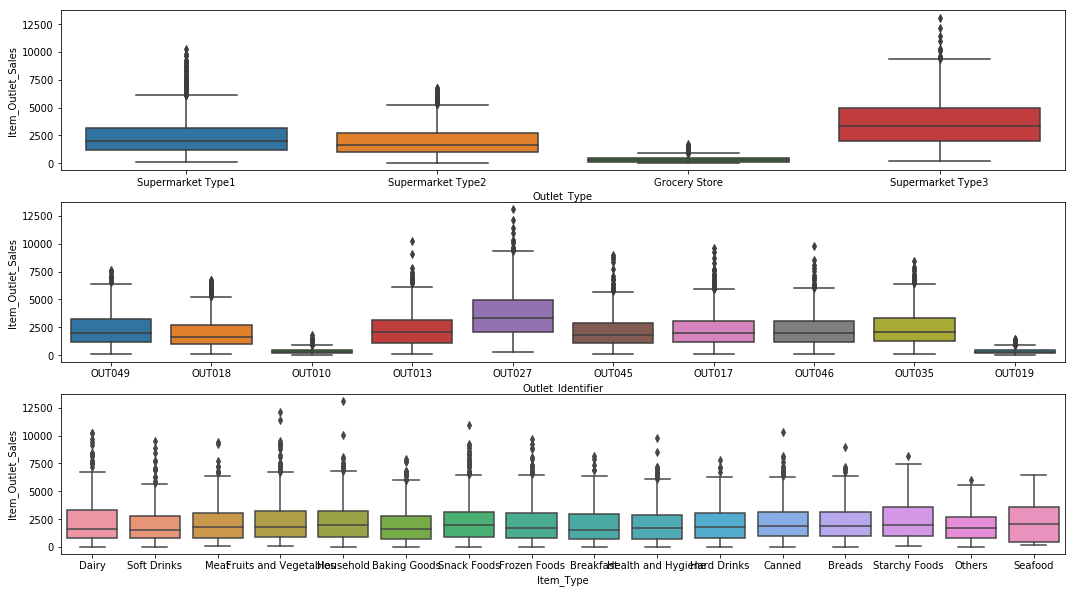

In [23]:
# Analyze the relation between the Outlet type and Outlet Identifier w.r.t Item sales.

plt.figure(figsize = (18,10))

plt.subplot(311)
sns.boxplot('Outlet_Type','Item_Outlet_Sales',data = df_train)



plt.subplot(312)
sns.boxplot('Outlet_Identifier','Item_Outlet_Sales',data = df_train)



plt.subplot(313)
sns.boxplot('Item_Type','Item_Outlet_Sales',data = df_train)
plt.show()

In [20]:
# Out010 and 19 have lesser sales w.r.t Out27 which is at higher end
# Grocery stores tend to have lesser sales w.r.t Type3 Markets

In [21]:
# Looking at the Outlet Establishment year w.r.t Net sales

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


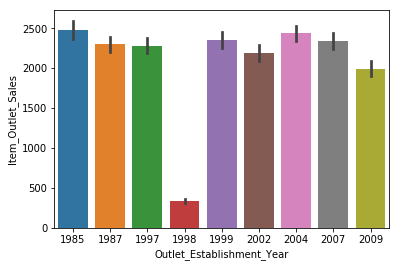

In [22]:
sns.barplot(df_train['Outlet_Establishment_Year'],df_train['Item_Outlet_Sales'])
# Analyse why 1998 have the min sales

In [24]:
print(df_train[df_train.Outlet_Establishment_Year == 1985]['Outlet_Type'].unique())
print(df_train[df_train.Outlet_Establishment_Year == 1998]['Outlet_Type'].unique())

# We can assume since there was only one Grocery Type Outelt in Year 1998 which resulted in lesser sales and we already know from above analysis Grocery stores have lesser sales.


['Supermarket Type3' 'Grocery Store']
['Grocery Store']


In [25]:
# Convert the year to number of years in operation

df_train['Outlet_Years'] = 2009 - df_train['Outlet_Establishment_Year']


In [25]:
# Data set have lot of Item Types which have some significance associated in the Item Identifier Number for ex: Item Identifier number starting as NC it consititue the item type as Houselhold. We will conmbine them as having it separate will have large sparse matrix during Model Building.

# df_train[df_train.Item_Type_Combined == 'Non-Consumable']['Item_Type'].unique()

In [26]:
print (df_train['Item_Type'].unique())
print('\n')
print (df_train['Item_Identifier'].apply(lambda x: x[0:2]).unique())
print('\n')
df_train['Item_Type_Combined'] = df_train['Item_Identifier'].apply(lambda x: x[0:2])
print('\n')
print(df_train['Item_Type_Combined'].value_counts())

# Rename

df_train['Item_Type_Combined'] = df_train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                              'DR':'Drinks'})
df_train['Item_Type_Combined'].value_counts()

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


['FD' 'DR' 'NC']




FD    6125
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64


Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [28]:
# Since we have now Non- Consumables and on other side we also have Item Fat content as only 2 values i.e Regular and Low Fat content. Non Consumables need to be converted into separate category

# df_train[df_train.Item_Type == 'Household']['Item_Fat_Content'].unique()
df_train.loc[df_train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df_train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Outlet_Years                 8523 non-null int64
Item_Type_Combined           8523 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 932.3+ KB


In [29]:
# one hot encoding for Object Variables
df_train = pd.get_dummies(columns=['Item_Type_Combined','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier','Item_Fat_Content'], data = df_train)


In [30]:
# Drop the item establishment year and item type as not needed

df_train.drop(columns=['Item_Type','Outlet_Establishment_Year'], inplace= True)


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 32 columns):
Item_Identifier                      8523 non-null object
Item_Weight                          8523 non-null float64
Item_Visibility                      8523 non-null float64
Item_MRP                             8523 non-null float64
Item_Outlet_Sales                    8523 non-null float64
Outlet_Years                         8523 non-null int64
Item_Type_Combined_Drinks            8523 non-null uint8
Item_Type_Combined_Food              8523 non-null uint8
Item_Type_Combined_Non-Consumable    8523 non-null uint8
Outlet_Type_Grocery Store            8523 non-null uint8
Outlet_Type_Supermarket Type1        8523 non-null uint8
Outlet_Type_Supermarket Type2        8523 non-null uint8
Outlet_Type_Supermarket Type3        8523 non-null uint8
Outlet_Location_Type_Tier 1          8523 non-null uint8
Outlet_Location_Type_Tier 2          8523 non-null uint8
Outlet_Location_Type_Tier 3  

In [118]:
X = df_train.drop(columns=['Item_Outlet_Sales','Item_Identifier'])
y = df_train['Item_Outlet_Sales']


In [432]:
# for feature in df_train.columns: # Loop through all columns in the dataframe
#     if df_train[feature].dtype == 'object': # Only apply for columns with categorical strings
#         df_train[feature] = pd.Categorical(df_train[feature]).codes

In [27]:
X.corrwith(y)

Item_Weight                          0.013165
Item_Visibility                     -0.128449
Item_MRP                             0.567574
Outlet_Years                         0.049135
Item_Type_Combined_Drinks           -0.034672
Item_Type_Combined_Food              0.031905
Item_Type_Combined_Non-Consumable   -0.010861
Outlet_Type_Grocery Store           -0.411727
Outlet_Type_Supermarket Type1        0.108765
Outlet_Type_Supermarket Type2       -0.038059
Outlet_Type_Supermarket Type3        0.311192
Outlet_Location_Type_Tier 1         -0.111287
Outlet_Location_Type_Tier 2          0.058261
Outlet_Location_Type_Tier 3          0.046376
Outlet_Size_High                     0.024170
Outlet_Size_Medium                   0.204701
Outlet_Size_Small                   -0.208912
Outlet_Identifier_OUT010            -0.284883
Outlet_Identifier_OUT013             0.024170
Outlet_Identifier_OUT017             0.032610
Outlet_Identifier_OUT018            -0.038059
Outlet_Identifier_OUT019          

In [ ]:
# From the above correlation we can make inference that below are good predictors for Sales

# 1- Item MRP, 2- Outlet_Type_Supermarket Type3, 3-Outlet_Identifier_OUT027.


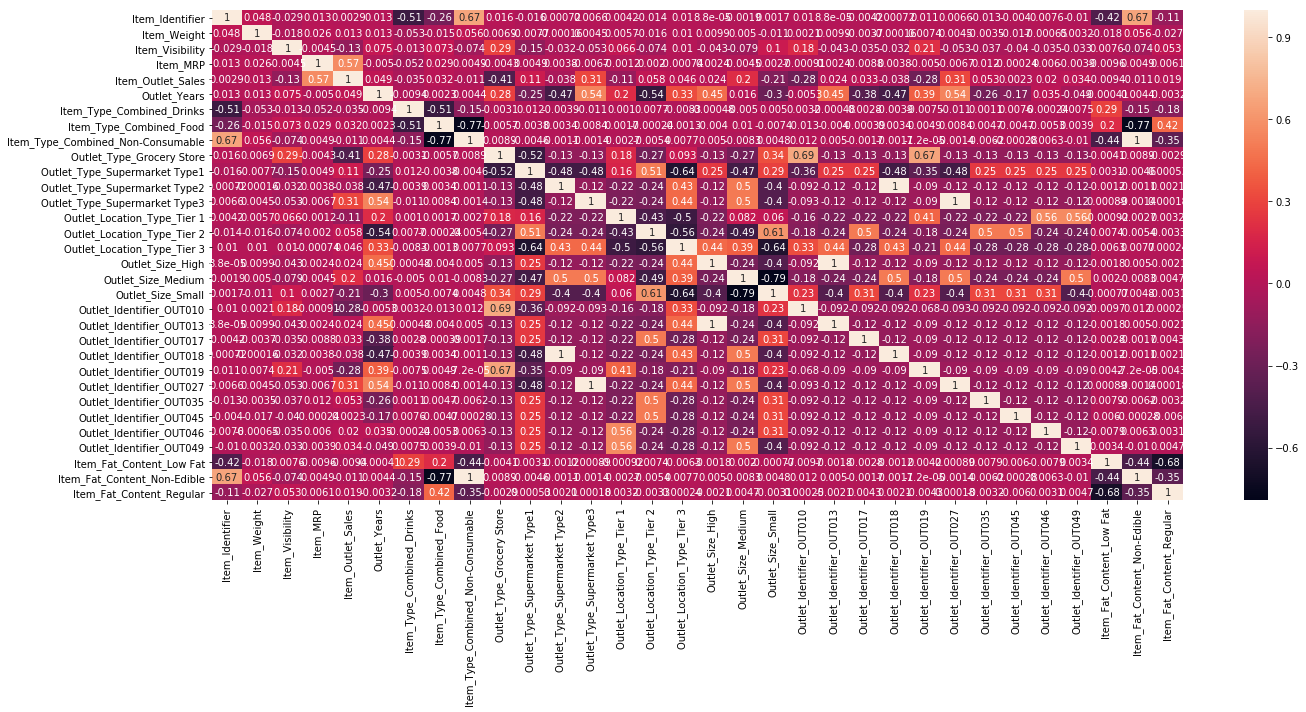

In [328]:
plt.figure(figsize = (20,10))
sns.heatmap(df_train.corr(),annot= True)
plt.tight_layout()
plt.show()

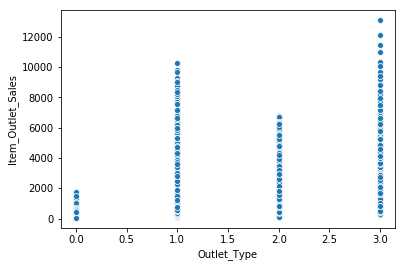

In [138]:
sns.scatterplot(df_train['Outlet_Type'],df_train['Item_Outlet_Sales'])

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [369]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 30 columns):
Item_Weight                          8523 non-null float64
Item_Visibility                      8523 non-null float64
Item_MRP                             8523 non-null float64
Outlet_Years                         8523 non-null int64
Item_Type_Combined_Drinks            8523 non-null uint8
Item_Type_Combined_Food              8523 non-null uint8
Item_Type_Combined_Non-Consumable    8523 non-null uint8
Outlet_Type_Grocery Store            8523 non-null uint8
Outlet_Type_Supermarket Type1        8523 non-null uint8
Outlet_Type_Supermarket Type2        8523 non-null uint8
Outlet_Type_Supermarket Type3        8523 non-null uint8
Outlet_Location_Type_Tier 1          8523 non-null uint8
Outlet_Location_Type_Tier 2          8523 non-null uint8
Outlet_Location_Type_Tier 3          8523 non-null uint8
Outlet_Size_High                     8523 non-null uint8
Outlet_Size_Medium              

In [109]:
# for feature in X.columns: # Loop through all columns in the dataframe
#     if X[feature].dtype == 'object': # Only apply for columns with categorical strings
#         X[feature] = pd.Categorical(X[feature]).codes

In [333]:
X.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular
0,9.30,0.016047,249.8092,10,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
1,5.92,0.019278,48.2692,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,17.50,0.016760,141.6180,10,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0


In [32]:
# Using RandomForestRegressor as ensemble for Model
rfc = RandomForestRegressor(random_state=1,n_estimators=10)

In [33]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [34]:
from pprint import pprint
pprint(rfc.get_params())

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [35]:
rfc.score(X_val,y_val)

0.5172527675311982

In [36]:
rfc.feature_importances_

array([8.67990509e-02, 1.09904510e-01, 4.42661644e-01, 2.30476208e-02,
       4.84312246e-03, 6.32225860e-03, 2.88090060e-03, 1.89852684e-01,
       1.78684403e-03, 1.53702916e-03, 3.03079647e-02, 3.44539489e-03,
       2.26053899e-03, 2.18644195e-03, 1.49786922e-03, 3.32276317e-03,
       2.86201441e-03, 1.73537678e-05, 1.23305967e-03, 4.27166729e-03,
       1.08878411e-03, 1.83491659e-05, 4.26718794e-02, 6.18480992e-03,
       5.27353923e-03, 4.71097674e-03, 3.18794056e-03, 7.26269954e-03,
       1.85763544e-03, 6.70265299e-03])

In [342]:
# Tuning the hyperparameters

In [37]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50]}


In [38]:
# Creating Random search Grid Model
random_rf = RandomizedSearchCV(estimator=rfc,param_distributions = random_grid, cv = 10,n_iter = 10, random_state= 1)               

In [ ]:
#  NOW ONLY PREDICT using random_rf.predict(X_test) : this will give you the best score for Model. No need to fit the again on train data.
# Since we used Randomeized search CV we should then resort to Grid Search to find the best parameter. 
#  When the best parameter are recieved then do th predict and get the accuracy which is the accuracy you will get on production data.

In [39]:


random_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [40]:
# Finding the best parameters given by algo
random_rf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [41]:
# Creating new RFC Model with tuned parameters given by RandomsearchCV
rfc_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [42]:
rfc_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [49]:
rfc_pred = rfc.predict(X_val)
rfc_pred

array([ 695.761  , 1214.28604, 2867.00138, ..., 2639.69726, 1339.05696,
       3519.55196])

In [45]:
# Printing score on basis of new parameters on train and validation set
print (rfc_model.score(X_train,y_train))
rfc_model.score(X_val,y_val)

0.8189141702278955


0.5653711851652702

In [45]:
# Printing the MSE and r2 score
from sklearn.metrics import mean_squared_error, r2_score


In [50]:
print (np.sqrt(mean_squared_error(y_val,rfc_pred)))

1196.2510085216902


In [51]:
# Not a good score and quite high RMSE for RFC. Let us try using Linear Reg with Lasso and Ridge 

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import KFold,cross_val_score

In [54]:
lg = LinearRegression()

In [55]:
lg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
lg_pred = lg.predict(X_test)
lg_pred

array([ 535.34046618, 1198.55526986, 3225.85801961, ..., 2627.27200657,
       2349.69353221, 2465.99485345])

In [62]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lg.coef_[idx]))

    
intercept = lg.intercept_

print('\n')

print("The intercept for our model is {}".format(intercept))

The coefficient for Item_Weight is 2.451094922984534
The coefficient for Item_Visibility is -179.13108967609585
The coefficient for Item_MRP is 15.595273636046937
The coefficient for Outlet_Years is 16.19727130862206
The coefficient for Item_Type_Combined_Drinks is -37.11637790230402
The coefficient for Item_Type_Combined_Food is 42.48334005165001
The coefficient for Item_Type_Combined_Non-Consumable is -5.366962149346684
The coefficient for Outlet_Type_Grocery Store is -899.8052598731585
The coefficient for Outlet_Type_Supermarket Type1 is 372.4698105046654
The coefficient for Outlet_Type_Supermarket Type2 is -75.32820824001958
The coefficient for Outlet_Type_Supermarket Type3 is 602.6636576085136
The coefficient for Outlet_Location_Type_Tier 1 is -222.32525184222814
The coefficient for Outlet_Location_Type_Tier 2 is 247.99770952397603
The coefficient for Outlet_Location_Type_Tier 3 is -25.672457681748426
The coefficient for Outlet_Size_High is -106.68841246195534
The coefficient for 

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
print (np.sqrt(mean_squared_error(y_test,lg_pred)))

1141.3112788894944


In [70]:
print (lg.score(X_train,y_train))
print (lg.score(X_test,y_test))

0.5637991016130433
0.5605764005844391


In [71]:
# Not a good score and coeffiecents are very high. Let us pinalize them by using Ridge with diff values of alpha and try to see if we can have best fit.

In [72]:
# Ridge Model

In [100]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)


for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, ridge.coef_[idx]))

    
intercept_ridge = ridge.intercept_

print('\n')

print("The intercept for our model is {}".format(intercept_ridge))

The coefficient for Item_Weight is 2.451284184079085
The coefficient for Item_Visibility is -176.45735033860404
The coefficient for Item_MRP is 15.595307991945825
The coefficient for Outlet_Years is 16.19574373085768
The coefficient for Item_Type_Combined_Drinks is -37.10344148385854
The coefficient for Item_Type_Combined_Food is 42.465991476513864
The coefficient for Item_Type_Combined_Non-Consumable is -5.36254999286395
The coefficient for Outlet_Type_Grocery Store is -899.6685032423193
The coefficient for Outlet_Type_Supermarket Type1 is 372.435600611115
The coefficient for Outlet_Type_Supermarket Type2 is -75.323254363154
The coefficient for Outlet_Type_Supermarket Type3 is 602.5561569826776
The coefficient for Outlet_Location_Type_Tier 1 is -222.3134288851876
The coefficient for Outlet_Location_Type_Tier 2 is 247.98718892910142
The coefficient for Outlet_Location_Type_Tier 3 is -25.6737600429938
The coefficient for Outlet_Size_High is -106.6508588156312
The coefficient for Outlet_

In [102]:
ridge_pred = ridge.predict(X_test)


In [103]:
print (ridge.score(X_train,y_train))
print (ridge.score(X_test,y_test))
print (np.sqrt(mean_squared_error(y_test,ridge_pred)))

0.5637990879095074
0.5605814094226276
1141.3047741639666


In [81]:
# We can see there is no impact with changing alpha values also. Let us look at lasso and visualize if there is impact:

In [104]:
lasso = Lasso(alpha = 0.3)
lasso.fit(X_train,y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lasso.coef_[idx]))

    
intercept_lasso = lasso.intercept_

print('\n')

print("The intercept for our model is {}".format(intercept_lasso))

The coefficient for Item_Weight is 2.4662414651779154
The coefficient for Item_Visibility is -51.71683298227449
The coefficient for Item_MRP is 15.596941512719143
The coefficient for Outlet_Years is 0.6780721733524909
The coefficient for Item_Type_Combined_Drinks is -17.61825478203909
The coefficient for Item_Type_Combined_Food is 58.235471696479514
The coefficient for Item_Type_Combined_Non-Consumable is -0.0
The coefficient for Outlet_Type_Grocery Store is -1945.2105086685522
The coefficient for Outlet_Type_Supermarket Type1 is 0.0
The coefficient for Outlet_Type_Supermarket Type2 is -320.2253145149453
The coefficient for Outlet_Type_Supermarket Type3 is 1358.8569235547682
The coefficient for Outlet_Location_Type_Tier 1 is -0.0
The coefficient for Outlet_Location_Type_Tier 2 is 4.511272625408288
The coefficient for Outlet_Location_Type_Tier 3 is -0.0
The coefficient for Outlet_Size_High is -0.0
The coefficient for Outlet_Size_Medium is 43.3078758962598
The coefficient for Outlet_Size

In [105]:
lasso_pred = lasso.predict(X_test)


In [106]:
print (lasso.score(X_train,y_train))
print (lasso.score(X_test,y_test))
print (np.sqrt(mean_squared_error(y_test,lasso_pred)))

0.5637837263691496
0.5605847894137677
1141.300384718998


In [117]:
# From Lasso we can analyze there are lot of feature which have 0 coeffecients hence not needed for model building. We can certainly remove those features from model and try to improve the score. Dropping Features with 0 Coeffecient

In [38]:
X = df_train.drop(columns=['Item_Outlet_Sales','Item_Identifier','Item_Type_Combined_Non-Consumable','Outlet_Type_Supermarket Type1',
'Outlet_Size_High','Outlet_Location_Type_Tier 3',
'Outlet_Identifier_OUT013',
'Outlet_Identifier_OUT010',
'Outlet_Identifier_OUT018',
'Outlet_Identifier_OUT019',
'Item_Fat_Content_Non-Edible',
'Outlet_Size_Small'])


y = df_train['Item_Outlet_Sales']

In [34]:
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X, y, test_size=0.20, random_state=1)
X_train_new, X_test_new,y_train_new,y_test_new = train_test_split(X,y,test_size=0.20,random_state=1)

In [ ]:
# Let us again run the Linear regression and Lasso/Ridge to analyse the performance now.

In [127]:
lg_new = LinearRegression()
lg_new.fit(X_train_new,y_train_new)

for idx, col_name in enumerate(X_train_new.columns):
    print("The coefficient for {} is {}".format(col_name, lg_new.coef_[idx]))

    
intercept_new = lg_new.intercept_

print('\n')

print("The intercept for our model is {}".format(intercept_new))

lg_pred_new = lg_new.predict(X_test_new)
lg_pred_new

print (np.sqrt(mean_squared_error(y_test,lg_pred_new)))
print (lg_new.score(X_train_new,y_train_new))
print (lg_new.score(X_test_new,y_test_new))

The coefficient for Item_Weight is 2.451094922985037
The coefficient for Item_Visibility is -179.13108967607104
The coefficient for Item_MRP is 15.595273636046922
The coefficient for Outlet_Years is 22.230247759044577
The coefficient for Item_Type_Combined_Drinks is -31.74941575295943
The coefficient for Item_Type_Combined_Food is 47.85030220099589
The coefficient for Outlet_Type_Grocery Store is -1703.9921279243915
The coefficient for Outlet_Type_Supermarket Type2 is -229.6217275025782
The coefficient for Outlet_Type_Supermarket Type3 is 490.7852846921738
The coefficient for Outlet_Location_Type_Tier 1 is -282.24775871255906
The coefficient for Outlet_Location_Type_Tier 2 is 306.8605187060854
The coefficient for Outlet_Size_Medium is 424.4233486498763
The coefficient for Outlet_Identifier_OUT017 is 194.3508432331322
The coefficient for Outlet_Identifier_OUT027 is 490.7852846921742
The coefficient for Outlet_Identifier_OUT035 is 185.1763071207551
The coefficient for Outlet_Identifier_O

In [128]:
# Not much improvement let us run again with number of degrees

In [156]:
from sklearn.preprocessing import PolynomialFeatures

In [157]:
poly = PolynomialFeatures(interaction_only=True,degree=3)

In [178]:
X_poly_new = poly.fit_transform(X)
X_train_new1, X_test_new1, y_train_new1, y_test_new1 = train_test_split(X_poly_new, y, test_size=0.20, random_state=1)
X_train_new1, X_val_new1, y_train_new1, y_val_new1 = train_test_split(X_poly_new, y, test_size=0.20, random_state=1)
X_train.shape

(6818, 20)

In [179]:
lg.fit(X_train_new1, y_train_new1)


print (lg.coef_)

intercept = lg.intercept_

print('\n')

print("The intercept for our model is {}".format(intercept))

[-7.99103838e-08 -6.74924602e+00 -1.98666924e+02 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


The intercept for our model is 603.3748619285959


In [180]:
print (lg.score(X_train_new1, y_train_new1))
lg.score(X_val_new1,y_val_new1)

0.616658997136606


0.5939581468818207

In [136]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train_new1,y_train_new1)
print ("Ridge model:", (ridge.coef_))

Ridge model: [   0.           -9.68541129 -137.08829148 ...    0.            0.
    0.        ]


In [137]:
print(ridge.score(X_train_new1, y_train_new1))
print(ridge.score(X_test_new1, y_test_new1))

0.6135328749987852
0.6044684537266721


In [142]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_new1,y_train_new1)

for idx, col_name in enumerate(X_train_new.columns):
    print("The coefficient for {} is {}".format(col_name, lasso.coef_[idx]))

    
intercept = lasso.intercept_

print('\n')

print("The intercept for our model is {}".format(intercept))


The coefficient for Item_Weight is 0.0
The coefficient for Item_Visibility is 0.4502142174888381
The coefficient for Item_MRP is -0.0
The coefficient for Outlet_Years is 15.642292010434176
The coefficient for Item_Type_Combined_Drinks is -40.363973124180625
The coefficient for Item_Type_Combined_Food is 0.0
The coefficient for Outlet_Type_Grocery Store is -60.086165381335164
The coefficient for Outlet_Type_Supermarket Type2 is -311.69782296129495
The coefficient for Outlet_Type_Supermarket Type3 is 0.0
The coefficient for Outlet_Location_Type_Tier 1 is 1088.803361566071
The coefficient for Outlet_Location_Type_Tier 2 is -0.0
The coefficient for Outlet_Size_Medium is 0.0
The coefficient for Outlet_Identifier_OUT017 is 6.16987353273909
The coefficient for Outlet_Identifier_OUT027 is 0.0
The coefficient for Outlet_Identifier_OUT035 is 84.74219759259101
The coefficient for Outlet_Identifier_OUT045 is 0.0
The coefficient for Outlet_Identifier_OUT046 is -0.0
The coefficient for Outlet_Identi

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [181]:
print(lasso.score(X_train_new1, y_train_new1))
print(lasso.score(X_val_new1, y_val_new1))


0.6145990242144512
0.5944292611525627


In [146]:
# Now Lasso is trying to kick out all the dimensions as we are penalizing it more hence we will not penalize it further.

In [147]:
# # Let us check out other Ensemble models to see the performance . 
# 1- RFC
# 2- Adaboost
# 3- GradientBoost
# 3- XGBoost
# 3- Catboost

In [39]:
X = df_train.drop(columns=['Item_Outlet_Sales','Item_Identifier','Item_Type_Combined_Non-Consumable','Outlet_Type_Supermarket Type1',
 'Outlet_Size_High','Outlet_Location_Type_Tier 3',
 'Outlet_Identifier_OUT013',
 'Outlet_Identifier_OUT010',
 'Outlet_Identifier_OUT018',
 'Outlet_Identifier_OUT019',
 'Item_Fat_Content_Non-Edible',
 'Outlet_Size_Small'])


y = df_train['Item_Outlet_Sales']




In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)


In [60]:
rfc  = RandomForestRegressor(n_estimators= 10,random_state=1)
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [61]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_val, y_val))

0.9151580174185582
0.513853730785969


In [165]:
# RFC Shown as being Overfit Model. We will now tune the parameters and anaylze if we can find the best spot in Bias-Variance Tradeoff

In [200]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [201]:
# Creating Random search Grid Model
random_rf = RandomizedSearchCV(estimator=rfc,param_distributions = random_grid, cv = 10,n_iter = 10, random_state= 1)
random_rf.fit(X_train,y_train)
random_rf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=94, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [189]:
rfc_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=94, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
rfc_model.fit(X_train,y_train)

In [202]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_val, y_val))


0.9151580174185582
0.513853730785969


In [203]:
rfc.feature_importances_

array([0.08853526, 0.11044632, 0.44332723, 0.04736287, 0.0045002 ,
       0.00870436, 0.18985268, 0.00327258, 0.02066175, 0.00384501,
       0.00356033, 0.00383706, 0.00433071, 0.03302988, 0.00595266,
       0.00523137, 0.0049541 , 0.00383303, 0.00715806, 0.00760454])

In [225]:
# kf = KFold(n_splits=10, shuffle=True, random_state=1)
# for train_index, test_index in kf.split(X):
#     rfc_model = rfc.fit(X[train_index], y[train_index])
#     predictions = rfc_model.predict(X[test_index])
#     actuals = y[test_index]
# print(mean_squared_error(actuals, predictions))
# # print(rfc.score(X_train, y_train))
# # print(rfc.score(X_val, y_val))

In [62]:
# Implementing AdaBoostRegressor

In [66]:
from sklearn.ensemble import AdaBoostRegressor

In [124]:
adreg = AdaBoostRegressor(n_estimators=10,learning_rate=0.1,random_state= 1)

In [125]:
adreg.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=10, random_state=1)

In [126]:
ada_pred = adreg.predict(X_val)
print (np.sqrt(mean_squared_error(y_val,ada_pred)))
print (adreg.score(X_train,y_train))
print (adreg.score(X_val,y_val))

1165.6310327738086
0.5347475113597693
0.5416498674707482


In [127]:
# Parameter tuning for Adabost

In [130]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
learning_rate = [0.01,0.05,0.1,0.3,1]
loss = ['linear', 'square', 'exponential']
# Create the random grid
random_grid1 = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'loss': loss}

In [134]:

random_rv1 = RandomizedSearchCV(estimator = adreg,param_distributions = random_grid1, cv = 10,n_iter = 10, random_state= 1)

In [135]:
random_rv1.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=10, random_state=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential']},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [136]:
random_rv1.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='square',
         n_estimators=50, random_state=1)

In [137]:
# Using the best parameters training again for Adaboost

In [147]:
adreg_new = AdaBoostRegressor(
learning_rate=0.05, loss='square',
         n_estimators=50, random_state=1)

In [148]:
adreg_new.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='square',
         n_estimators=50, random_state=1)

In [149]:
ada_pred_new = adreg.predict(X_test)
print (np.sqrt(mean_squared_error(y_test,ada_pred_new)))
print (adreg.score(X_train,y_train))
print (adreg.score(X_test,y_test))

1165.6310327738086
0.5347475113597693
0.5416498674707482


In [150]:
#  Implementing GradientBoosting

In [151]:
from sklearn.ensemble import GradientBoostingRegressor

In [153]:
gdb_reg = GradientBoostingRegressor(n_estimators= 50, random_state=1)

In [154]:
gdb_reg.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [159]:
from sklearn.metrics import explained_variance_score

In [166]:
gdb_pred = gdb_reg.predict(X_val)
print(gdb_reg.score(X_train,y_train))
print(gdb_reg.score(X_val,y_val))
print (np.sqrt(mean_squared_error(y_val,gdb_pred)))
# print(explained_variance_score(y_val,gdb_pred))

0.6210807984362223
0.5957193067305369
1094.7221903602253


In [167]:
#  Parameter tuning for GradientBoost

In [175]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
learning_rate = [0.01,0.05,0.1,0.3,1,0.5]
max_depth = [int(x) for x in np.linspace(2, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

max_features = ['auto']

# Create the random grid
param_grid = {'n_estimators': n_estimators,'learning_rate': learning_rate,
              'max_depth':max_depth,'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf, 'max_features': max_features
             
             }

In [176]:
random_rv2 = RandomizedSearchCV(estimator = gdb_reg,param_distributions = param_grid, cv = 10,n_iter = 10, random_state= 1)

In [177]:
random_rv2.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...ate=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1, 0.5], 'max_depth': [2, 11, 21, 31, 41, 51, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto']},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [178]:
random_rv2.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=60,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=40,
             n_iter_no_change=None, presort='auto', random_state=1,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [179]:
gdb_reg_new = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=60,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=40,
             n_iter_no_change=None, presort='auto', random_state=1,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [180]:
gdb_reg_new.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=60,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=40,
             n_iter_no_change=None, presort='auto', random_state=1,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [182]:
gdb_pred_new = gdb_reg_new.predict(X_test)
print(gdb_reg.score(X_train,y_train))
print(gdb_reg.score(X_test,y_test))
print (np.sqrt(mean_squared_error(y_test,gdb_pred_new)))

0.6210807984362223
0.5957193067305369
1250.0184447235567


In [183]:
# Implement XGBoostRegressor--- ! pip install xgboost==0.80


In [41]:

import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [80]:
xg_boost = xgb.XGBRegressor(n_estimators= 50, random_state=1, learning_rate=0.1, max_depth=2)

In [81]:
xg_boost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [82]:
xg_boost_pred = xg_boost.predict(X_val)
print(xg_boost.score(X_train,y_train))
print(xg_boost.score(X_val,y_val))
print (np.sqrt(mean_squared_error(y_val,xg_boost_pred)))
# print(explained_variance_score(y_val,gdb_pred))


0.6070007233141463
0.596248710843533
1094.0051881709737


In [83]:
# Hyperparameter tunining for XGBoost
xgb.XGBRegressor(n_estimators= 50, random_state=1, learning_rate=0.1, max_depth=2)

In [105]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
learning_rate = [0.01,0.05,0.1,0.3,1,0.5,0.025,0.015]
max_depth = [3,5,7,9,12,15,17,25]
min_child_weight = [1,3,5,7]
gamma= [0.3,0.5,0.7,0.9,1.0]
subsample = [0.6,0.7,0.8,0.9,1.0]
colsample_bytree = [0.6,0.7,0.8,0.9,1.0]
reg_lambda = [0.01]
# Create the random grid
param_grid_xg= {'n_estimators': n_estimators,'learning_rate': learning_rate,
              'max_depth':max_depth,'min_child_weight':min_child_weight,'gamma':gamma,
            'subsample': subsample,
   'colsample_bytree': colsample_bytree,'reg_lambda':reg_lambda 
    
    
}
              
    


In [106]:
random_rv3 = RandomizedSearchCV(estimator = xg_boost,param_distributions = param_grid_xg, cv = 10,n_iter = 10, random_state= 1)

In [107]:
random_rv3.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1, 0.5, 0.025, 0.015], 'max_depth': [3, 5, 7, 9, 12, 15, 17, 25], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.3, 0.5, 0.7, 0.9, 1.0], 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], 'reg_lambda': [0.01]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', 

In [108]:
random_rv3.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=1.0, learning_rate=0.3,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=1, reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

In [110]:
xg_boost_new = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=1.0, learning_rate=0.3,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=1, reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

In [111]:
xg_boost_new.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=1.0, learning_rate=0.3,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=1, reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

In [114]:
xg_boost_pred_new = xg_boost_new.predict(X_test)
print(xg_boost_new.score(X_train,y_train))
print(xg_boost_new.score(X_test,y_test))
print (np.sqrt(mean_squared_error(y_test,xg_boost_pred_new)))


#  Turning into Overfitting

0.6320200779337751
0.5870341093290039
1106.4187109868155


In [115]:
#  Looking at the above Models min RMSE is for XGBoost so far..